AIM: TO IMPLEMENT REGRESSION BY USING..

    1.  Simple Linear Regression
    2.  Linear Gradient

##Simple Linear Regression:

Simple Linear Regression is a statistical method for modeling the relationship between two variables: one independent variable and one dependent variable.
The goal of Simple Linear Regression is to find a linear equation that best describes the relationship between the two variables.
The equation for Simple Linear Regression is typically expressed as: y = mx + b, where y is the dependent variable, x is the independent variable, m is the slope of the line, and b is the y-intercept.

## Linear Gradient Descent:

Linear Gradient Descent is an iterative optimization algorithm used to find the optimal values of the coefficients in a linear regression model.
The algorithm works by iteratively adjusting the coefficients in the direction of steepest descent of the cost function, which measures the difference between the predicted and actual values.
The learning rate is a hyperparameter that controls the step size in each iteration of the algorithm.
Linear Gradient Descent is used to find the optimal values of the coefficients that minimize the cost function and thus produce the best fit of the model to the data.

<h2>IMPORTING REQUIRED LIBRARIES</h2>

    1. Numpy : For performing numerical operations more easier in this we use it mainly for generating random numbers

    2. Pandas : For loading and and performing various operations on the datasets

    3. Matplotlib : For plotting various points in graphs for comparing and observing the changes

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initially Generate a random array with size 20 numbers ranging from 1 to 100

This can be done using np.random.randint() this takes 3 arguments 
The minimum number, The maximum number and the size of the array to be generated

In [5]:
x=np.random.randint(1,101,20)

In [6]:
x

array([31, 93,  6,  8, 48, 66, 66, 70, 82, 54, 23, 77, 46, 13, 14, 41, 80,
       70, 70, 49])

# Generating another array 'y' form 'x'

In [7]:
y=3*x+5

In [8]:
y

array([ 98, 284,  23,  29, 149, 203, 203, 215, 251, 167,  74, 236, 143,
        44,  47, 128, 245, 215, 215, 152])

# Plotting the X and Y in a plot 

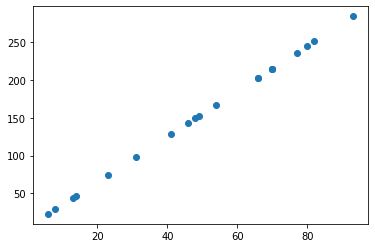

In [9]:
plt.scatter(x,y)

Finding the mean of x and y using the np.mean function. It takes one parameter that is the list or array of items for which we have to find the mean

In [10]:
meanx=np.mean(x)
meany=np.mean(y)

Writing a function to find the values of $a_{1}$, $a_{0}$ by simple linear regression. It take two arguments i.e. two lists or two arrays of elements
<hr>

  ***Formulae to find the values of***
  $a_{1}$, $a_{0}$


  $a_{1} = \frac{\bar{xy} - \bar{y}.\bar{x}}{\bar{x^{2}}-\bar{x}^{2}}$


  $a_{0}=\bar{y}-a_{1}.\bar{x}$


In [11]:
def simpleLinearRegression(x,y):
  mx=np.mean(x)
  my=np.mean(y)
  mxx=np.mean(x*x)
  z=x*y
  mz=np.mean(z)
  a1=(mz-mx*my)/(mxx-mx*mx)
  a0=-a1*mx+my
  return a0,a1
  

Calling the function simpleLinearRegression and passing the arguments x and y and priting their values

In [12]:
print(simpleLinearRegression(x,y))

(5.000000000000142, 2.9999999999999973)


Defining a Function meanSquareError that helps in finding the mean square error of the actual and observed values of $a_{1}$, $a_{0}$ . This takes 4 arguments 
two lists or array of elements for which we need to find the relation and the values of $a_{1}$, $a_{0}$

In [13]:
def meanSquareError(x,a0,a1,y):
  m=np.size(x)
  yobs=a0+a1*x
  diffsq=((y-yobs)**2)
  diffsum=np.sum(diffsq)
  error=1/m * diffsum
  return error

Defining a function linearGradiant to find the relation between two list or array of elements so that it should take the random values of $a_{1}$, $a_{0}$ using the np.random.randint() and based on the error and learning rate we calculate $a_{1}$, $a_{0}$ by the formulae


### $a_{0}=a_{0}+\alpha *\frac{2}{m}. \sum(y_{1}-y'_{1})$

###$a_{1}=a_{1}-\alpha *\frac{\partial E}{\partial a_{1}}$

In my case this will be repeated untill i get the error less than 0.00001

And I had updated the alpha value that is the running rate such that if the error of current iteration is greater than the previous iteration then the learning rate will be decreased

In [16]:
def linearGradiant(x,y):
  a0=np.random.randint(1,100)
  a1=np.random.randint(1,100)
  error=meanSquareError(x,a0,a1,y)
  alpha=1
  print(a0)
  print(a1)
  print("error",error)

  #storing the values of errors and learning rates for plotting the graph further

  errors = [error]
  alphas = [alpha]

  while error>=0.00001:
    er=error
    yobs=a0+a1*x
    diff=(y-yobs)
    sumdiff=np.sum(diff)
    diffmx=(y-yobs)*x
    sumdiffmx=np.sum(diffmx)
    m=np.size(x)
    a0=a0+alpha*2/m * sumdiff
    print("a0",a0)
    a1=a1+alpha*2/m * sumdiffmx
    print("a1",a1)
    error=meanSquareError(x,a0,a1,y)
    if er<error:
      alpha=alpha*0.1
    
    #appending the changes alpha and error values
    alphas.append(alpha)
    errors.append(error)

    print("error",error)

  return errors,alphas



Calling the function and observing the values of $a_{1}$, $a_{0}$

In [19]:
errors,alphas=linearGradiant(x,y)

Streaming output truncated to the last 5000 lines.
a1 2.9998853072578364
error 1.1529756476244699e-05
a0 5.007343976719265
a1 2.999885312159917
error 1.152877091102913e-05
a0 5.007343662830471
a1 2.9998853170617883
error 1.1527785430042428e-05
a0 5.007343348955093
a1 2.99988532196345
error 1.1526800033299414e-05
a0 5.00734303509313
a1 2.999885326864902
error 1.1525814720802257e-05
a0 5.007342721244582
a1 2.9998853317661447
error 1.1524829492524723e-05
a0 5.007342407409448
a1 2.999885336667178
error 1.1523844348459695e-05
a0 5.007342093587727
a1 2.999885341568002
error 1.1522859288601466e-05
a0 5.00734177977942
a1 2.999885346468616
error 1.1521874312944965e-05
a0 5.007341465984525
a1 2.999885351369021
error 1.1520889421520434e-05
a0 5.007341152203042
a1 2.9998853562692163
error 1.1519904614256827e-05
a0 5.0073408384349705
a1 2.999885361169202
error 1.1518919891162714e-05
a0 5.00734052468031
a1 2.9998853660689786
error 1.1517935252253923e-05
a0 5.007340210939059
a1 2.9998853709685456
err

Plotting graphs between errors and number of iterations and between alpha values and number of iterations

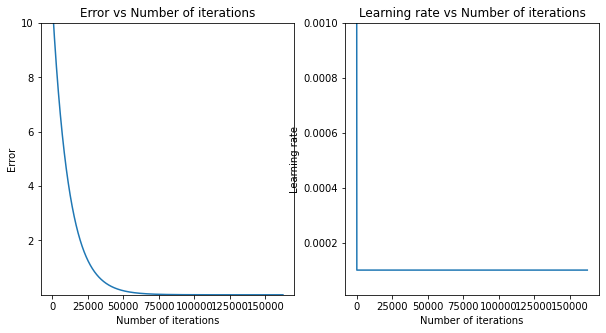

In [116]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(errors)
plt.ylim(0.0000001,10)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.title("Error vs Number of iterations")
plt.subplot(1,2,2)
plt.plot(alphas)
plt.ylim(0.00001,0.001)
plt.xlabel("Number of iterations")
plt.ylabel("Learning rate")
plt.title("Learning rate vs Number of iterations")  
plt.show()